<a href="https://colab.research.google.com/github/sunhuanhuan920/ECE1512_2023F_ProjectRepo_Zhenhuan_Sun/blob/main/Project%20A/Project_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Task 1: Knowledge Distillation in MNIST Dataset**

**Load Dataset**

In [15]:
# import tensorflow.compat.v2 as tf
import tensorflow as tf
import tensorflow_datasets as tfds
from typing import Union

# tf.enable_v2_behavior()

builder = tfds.builder('mnist')
BATCH_SIZE = 256
NUM_EPOCHS = 12
NUM_CLASSES = 10  # 10 total classes.

# Load train and test splits.
def preprocess(x):
  image = tf.image.convert_image_dtype(x['image'], tf.float32)
  subclass_labels = tf.one_hot(x['label'], builder.info.features['label'].num_classes)
  return image, subclass_labels


mnist_train = tfds.load('mnist', split='train', shuffle_files=False).cache()
mnist_train = mnist_train.map(preprocess)
mnist_train = mnist_train.shuffle(builder.info.splits['train'].num_examples)
mnist_train = mnist_train.batch(BATCH_SIZE, drop_remainder=True)

mnist_test = tfds.load('mnist', split='test').cache()
mnist_test = mnist_test.map(preprocess).batch(BATCH_SIZE)

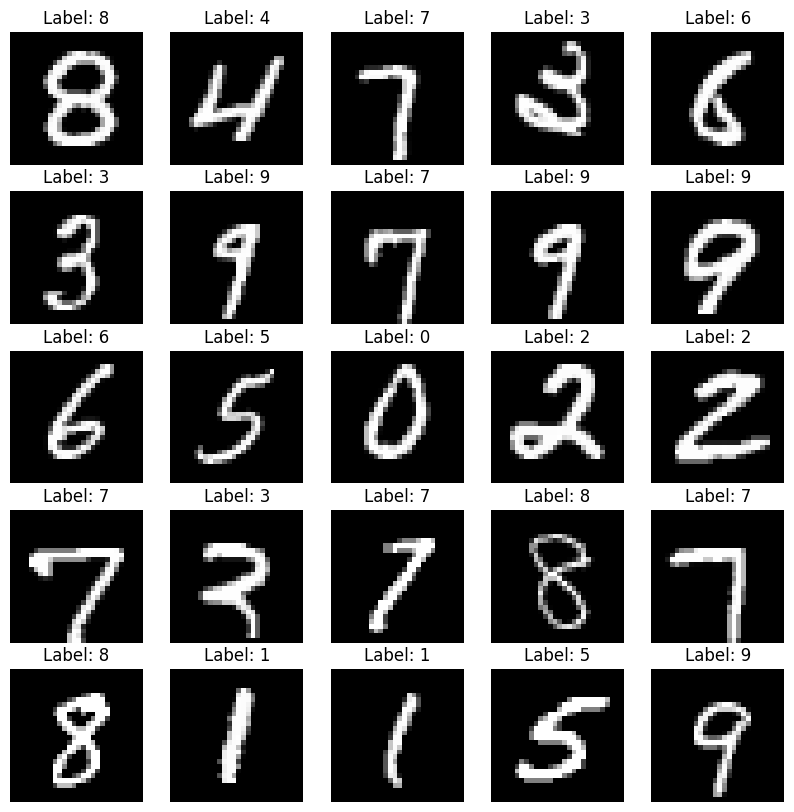

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from mnist_train
for images, labels in mnist_train.take(1):
    plt.figure(figsize=(10, 10))
    # Visualize the first 25 images from the batch
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Label: %d' % tf.argmax(labels[i]))
        plt.axis('off')
    plt.show()

# **Task 2: Knowledge Distillation in MHIST Dataset**